In this notebook we will show how to apply albumentations to the case when the same transformation can be applied to different targets.

For example, we can apply the same rotation to: 
* image1, image2, ... imageN, 
* bboxes1, bboxes2, ... bboxesM
* keypoints1, keypoints2, ... keypointsK
* mask1, mask2, ..., maskL

The trick is to define additional target dictionary that maps new targets on the default one.

For example:
```python
transform = albu.Compose(transformations, 
                         p=1, 
                         additional_targets={
    'image1': 'image',
    'image2': 'image',
    ...
    'imageN': 'image',

    'bboxes1': 'bboxes',
    'bboxes1': 'bboxes',
    ...
    'bboxesM': 'bboxes',

    'keypoints1': 'keypoints',
    'keypoints2': 'keypoints',
    ...
    'keypointsK': 'keypoints',

    'mask1': 'mask',
    'mask2': 'mask',
    ...
    'maskL': 'mask'
    })
```

In [1]:
%matplotlib inline
from urllib.request import urlopen
from matplotlib import pyplot as plt

import albumentations as albu
import numpy as np
import cv2
import os

In [2]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
image = download_image('https://habrastorage.org/webt/en/h4/14/enh414tt02dbgivt0vjnn2ztrg8.jpeg')
image0 = download_image('https://habrastorage.org/webt/_r/cm/gv/_rcmgvkes5hubvgsyppl9hn5ydw.jpeg')
image1 = download_image('https://habrastorage.org/webt/4i/hb/aj/4ihbajlpywjq151jf2eqydxofbk.jpeg')

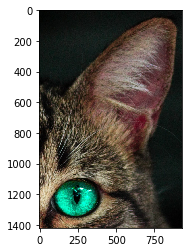

In [4]:
plt.imshow(image)

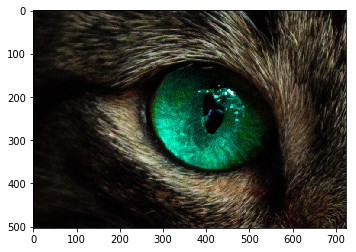

In [5]:
plt.imshow(image0)

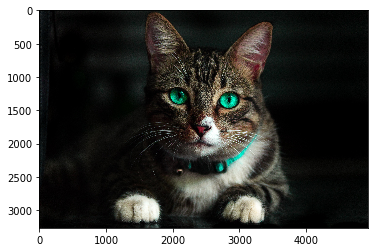

In [6]:
plt.imshow(image1)

In [7]:
images = [image, image0, image1]

In [8]:
def create_transformer(transformations, images):
    target = {}
    for i, image in enumerate(images[1:]):
        target['image' + str(i)] = 'image'
    return albu.Compose(transformations, p=1, additional_targets=target)(image=images[0],
                                                                        image0=images[1],
                                                                        image1=images[2])

In [9]:
transformed = create_transformer([albu.VerticalFlip(p=1)], images)

im = transformed['image']
im0 = transformed['image0']
im1 = transformed['image1']

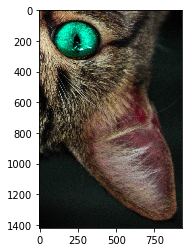

In [10]:
plt.imshow(im)

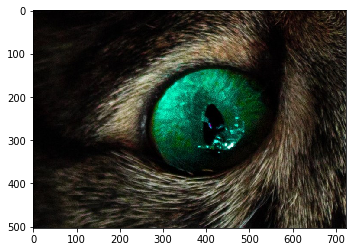

In [11]:
plt.imshow(im0)

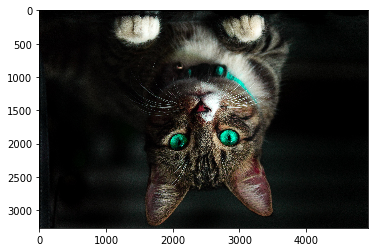

In [12]:
plt.imshow(im1)